In [2]:
import numpy as np
import pandas as pd

In [5]:
# loading the processed_data from txt file
in_data = np.loadtxt('in_train.txt', dtype=float)
out_data = np.loadtxt('out_train.txt', dtype=float)

In [10]:
in_data.shape

(53447, 10)

In [9]:
out_data.shape

(53447, 9)

In [21]:
# shuffling the data 
final_data = np.concatenate((in_data, out_data), axis = 1)  # merging the input n expected output
print(final_data.shape)
np.random.shuffle(final_data)  # shuffling the data

(53447, 19)


In [29]:
X = final_data[:, :10]
Y = final_data[:, -9:]

In [30]:
Y.shape

(53447, 9)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35809, 10)
(17638, 10)
(35809, 9)
(17638, 9)


In [99]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=50)
clf = clf.fit(X_train, y_train)

In [39]:
y_pred = clf.predict(X_test)

In [36]:
print(y_test)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [37]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[ 910,    0,    0,    0,    3,    4,    2,    0,    0],
       [   0, 1501,    2,    6,    8,   21,    2,    1,    0],
       [   0,    0, 1482,    0,    0,    0,    1,    0,    0],
       [   0,    3,    0,  398,    7,    7,    0,    5,    0],
       [   1,   25,    0,    8, 2618,   57,    8,    5,    0],
       [   4,   18,    0,    5,   78, 5599,   36,   25,    0],
       [   0,    4,    0,    0,    5,   47, 1672,    6,    0],
       [   0,    3,    0,    1,    8,   16,   12, 2437,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  577]],
      dtype=int64)

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y_test, y_pred, average='macro') 

0.9771207754777511

In [46]:
testing_data = pd.read_csv('test_nvPHrOx.csv')

In [47]:
url_data= testing_data['Url']

In [56]:
import re
def clean_list(input):
    output = []
    for i in input:
        text = re.sub(r"http://", "", i)
        text = re.sub(r"https://", "", text)
        #print(output)
        output.append(text)
    return output

In [57]:
url_data_pro = clean_list(url_data)

In [58]:
url_data_pro[:4]

['www.isrctn.com/ISRCTN57801413',
 'www.clinicaltrialsregister.eu/ctr-search/trial/2006-006214-16/GB',
 'www.clinicaltrialsregister.eu/ctr-search/trial/2006-004265-34/LT',
 'www.clinicaltrialsregister.eu/ctr-search/trial/2010-022183-12/IT']

In [59]:
from keras.preprocessing import text, sequence 

c:\users\eratsau\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [60]:
def createVocab(field):
    #not_found = 'nan'
    vocab = []
    for line in field:
        for i in line.split('/'):
            if i not in vocab:
                vocab.append(i)
    return vocab 
 
# generating seq IDs for words in vocabulary
def genSeqNo(vocabulary):
    i=1.0
    vocab_seq = {}
    for word in vocabulary:
        if word not in vocab_seq:
            vocab_seq[word] = i
            i = i+1
    return vocab_seq

# function to replace words with its uniq seq ID
def word2Seq(data):
    result_seq = []
    #max_seq = list(t_vocab_seq.items())[-1][1]
    seq_len = []
    for line in data:        
        seq = []
        curr_len = 0
        for word in line.split('/'):
            curr_len = curr_len + 1
            if word in t_vocab_seq:
                seq.append(t_vocab_seq[word])
            else:
                seq.append(0)
        result_seq.append(seq)    # to append seqID of line
        seq_len.append(curr_len)  # to find and append length of line
    return result_seq, seq_len

def seqNormalize(seq, data):
    norm_seq = []
    max_seq = max(seq.values())
    norm_seq[:] = [[ele / max_seq for ele in sub] for sub in data]
    return norm_seq


In [61]:
url_vocab = createVocab(url_data_pro)   # creating vocabulary 
t_vocab_seq = genSeqNo(url_vocab)       # generating seqID for each word in vocab
url_seq, seqn_len = word2Seq(url_data_pro)    # replacing word with seqID and a list of each line_length
url_seq_norm = seqNormalize(t_vocab_seq, url_seq)    # normalizing the seqn IDs between 0 n 1

In [62]:
url_seq[:4]

[[1.0, 2.0],
 [3.0, 4.0, 5.0, 6.0, 7.0],
 [3.0, 4.0, 5.0, 8.0, 9.0],
 [3.0, 4.0, 5.0, 10.0, 11.0]]

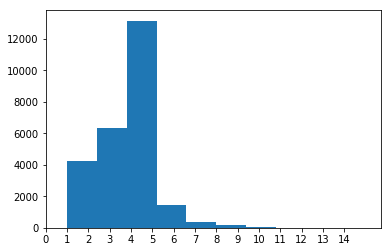

In [64]:
import matplotlib.pyplot as plt
# plotting frequency distribution of SeqnIDs
plt.hist([seqn_len])
plt.xticks(range(15))
plt.show()
# as observed from histogram, taking max_seqn_len as 10

In [65]:
# padding seqn to max_seqn_length
#url_seq_pad = sequence.pad_sequences(url_seq_norm, maxlen = max_seq_len, dtype='float32', padding='post')
url_seq_pad = sequence.pad_sequences(url_seq, maxlen = 10, dtype='float32', padding='post')

In [100]:
pred_testing = clf.predict(url_seq_pad)

In [101]:
test_prediction = pred_testing.argmax(axis=1)

In [108]:
test_prediction[:4]

array([4, 4, 4, 4], dtype=int64)

In [71]:
# training data
input_data = pd.read_csv('train.csv')
label = np.array(input_data['Tag'])

# one-hot encoding via sklearn
#https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(label)

In [102]:
label_decoded = np.array(label_encoder.inverse_transform(test_prediction))

c:\users\eratsau\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [103]:
print(label_decoded[:4])
#print(label_decodede)

['news' 'news' 'news' 'news']


In [83]:
webid = np.array(testing_data['Webpage_id'])

In [104]:
print(webid.shape)
print(label_decoded.shape)
w = webid.reshape(-1,1)
l = label_decoded.reshape(-1,1)

(25787,)
(25787,)


In [105]:
final_output = np.concatenate((w, l),axis = 1 )

In [106]:
final_output[:4]

array([[31, 'news'],
       [32, 'news'],
       [33, 'news'],
       [34, 'news']], dtype=object)

In [107]:
np.savetxt('final_output.txt', final_output, fmt='%s')